In [1]:
!pip install gymnasium
import numpy as np
import matplotlib.pyplot as plt
import gymnasium as gym

import warnings
warnings.filterwarnings('ignore')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 6.2 MB/s eta 0:00:00


In [2]:
gym.__version__

'0.29.1'

# Enviroment

![taxi.gif](https://www.gymlibrary.dev/_images/taxi.gif)

https://www.gymlibrary.dev/environments/toy_text/taxi/

В среде Taxi должно забирать пассажиров и доставлять их в пункт назначения на небольшой стоянке, двигаясь по кратчайшему пути.

## $\varepsilon$-Greedy Policy:
$$
\begin{array}{l}
\pi(a|s) =
\left\{
\begin{array}{ll}
1 - \varepsilon + \varepsilon / m,& \text{ если } a \in \mathrm{argmax}_{a' \in \mathcal{A}}\, Q(s,a'),\\
\varepsilon / m,& \text{ иначе }
\end{array}
\right.
\end{array}
$$

In [3]:
def get_epsilon_greedy_action(q_values, epsilon, action_n):

    policy = np.ones(action_n) * epsilon / action_n
    max_action = np.argmax(q_values)
    policy[max_action] += 1 - epsilon

    return np.random.choice(np.arange(action_n), p=policy)

## Solving "Taxi" enviroment with Q-learning method

### Q-Learning Algorithm

Пусть $Q(s,a) = 0$ и $\varepsilon = 1$.

Для каждого эпизода $k$ делаем:

Пока эпизод не закончен делаем:

1. Находясь в состоянии $S_t$ совершаем действие $A_t \sim \pi(\cdot|S_t)$,
где $\pi = \varepsilon\text{-greedy}(Q)$, получаем награду $R_t$  переходим в состояние $S_{t+1}$.

2. По $(S_t,A_t,R_t,S_{t+1})$ обновляем $Q$:
$$
Q(S_t,A_t) \leftarrow Q(S_t,A_t) + \alpha(R_t + \gamma \max\limits_{a'} Q(S_{t+1},a') - Q(S_t,A_t))
$$

для Q-learning    Q(St,At)←Q(St,At)+α(Rt+γQ(St+1,At+1)−Q(St,At))

Уменьшаем $\varepsilon$

# Домашнее задание №1 . Суть (настройки):

>На основе материалов лекции и основываясь на реализации алгоритма SARSA, приведенного в практической части занятия, реализовать алгоритм Q-learning на той же среде "Taxi", которая использовалась на практической части вебинара. В коде используется одна d внешняя функция = "ε -Greedy Policy"

> ============================================

>Описание/Пошаговая инструкция выполнения домашнего задания:
Реализовать алгоритм Монте-Карло в виде функции принимающей на вход:
* env - окружение,
* episode_n - число эпизодов обучения,
* gamma=0.99 - гиперпараметр модели,
* trajectory_len=500 - длина траектории,
* alpha=0.5 - скорость обучения
* Запустить цикл обучения и получить график суммарной награды в зависимости от количества эпизодов обучения, т.е визуализацию обучения модели.

In [7]:
env = gym.make("Taxi-v3")

#def SARSA(env, episode_n, gamma=0.99, trajectory_len=500, alpha=0.5):
def QLearning(env, episode_n, trajectory_len, gamma=0.99, t_max=500, alpha=0.5):
    total_rewards = np.zeros(episode_n)  # Создаем массив для хранения общих вознаграждений для каждого эпизода

    state_n = env.observation_space.n  # Получаем количество состояний в среде
    action_n = env.action_space.n  # Получаем количество действий в среде
    qfunction = np.zeros((state_n, action_n))  # Создаем Q-функцию (матрицу состояние-действие) и инициализируем её нулями

    for episode in range(episode_n):  # Запускаем цикл для каждого эпизода
        epsilon = 1 / (episode + 1)  # Уменьшаем параметр epsilon для epsilon-жадной стратегии с каждым эпизодом

        state = env.reset()[0]  # Сбрасываем среду и получаем начальное состояние
        action = get_epsilon_greedy_action(qfunction[state], epsilon, action_n)  # Получаем действие с использованием epsilon-жадной стратегии

        for _ in range(trajectory_len):  # Запускаем цикл для каждого шага внутри эпизода (ограниченного trajectory_len)
            next_state, reward, done, _, _ = env.step(action)  # Выполняем выбранное действие и получаем следующее состояние, вознаграждение и флаг завершения
            next_action = get_epsilon_greedy_action(qfunction[next_state], epsilon, action_n)  # Получаем следующее действие с использованием epsilon-жадной стратегии

            next_max = np.max(qfunction[next_state])

            # -->>> меняем вот эту строку и всё !!!!
            #  qfunction[state][action] += alpha * (reward + gamma * qfunction[next_state][next_action] - qfunction[state][action])  # Обновляем Q-функцию согласно формуле метода SARSA

            qfunction[state][action] += alpha * (reward + gamma * next_max - qfunction[state][action])  # Обновляем Q-функцию согласно формуле метода QLearning

            state = next_state  # Переходим в следующее состояние
            action = next_action  # Переходим в следующее действие

            total_rewards[episode] += reward  # Добавляем полученное вознаграждение к общему вознаграждению текущего эпизода

            if done:  # Если эпизод завершился, выходим из цикла
                break

    return total_rewards  # Возвращаем массив общих вознаграждений для каждого эпизода

[-1976. -1526. -1508.  -840. -1047. -1544. -1175.  -328. -1355. -1490.
  -971.  -585. -1217.  -643.  -152.  -398. -1580.  -397.   -50.  -173.
 -1364. -1526. -1157.  -743.  -321.  -118.  -134.  -117.     7.  -378.
   -64.  -191.  -126.  -202.  -932.   -94.  -140.   -95.  -266.  -296.
  -361.  -104.  -188.   -63.   -59.  -185.  -117.  -157.  -128.  -131.
  -280.  -297.  -261.  -155.  -120.   -12.  -276.  -144.   -98.   -89.
   -10.   -30.  -173.  -114.   -99.  -208.  -159.  -153.  -172.  -265.
   -98.  -130.   -74.   -97.  -123.  -149.    13.  -142.   -42.   -26.
  -174.   -42.  -253.  -164.    12.   -29.   -91.   -12.    14.    -7.
   -38.  -247.    10.   -16.  -164.   -33.   -67.  -122.    -2.  -159.]


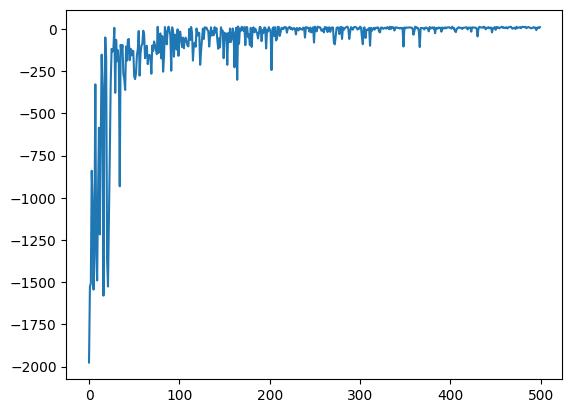

In [11]:
total_rewards = QLearning(env, episode_n=500, trajectory_len=500, t_max=1000, gamma=0.99, alpha=0.5)

print(total_rewards[:100])

plt.plot(total_rewards)
plt.show()